In [1]:
!pip3 install scikit-learn matplotlib seaborn

  Using cached scikit_learn-0.24.2-cp36-cp36m-manylinux2010_x86_64.whl (22.2 MB)
  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached Pillow-8.4.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl (9.5 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)


In [2]:
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [3]:
digits = datasets.load_digits()

# 1.  Explore y describa que información contiene cada uno de los items del conjunto de datos y el tipo de dato que almacenan?

Es un dataset orientado a la clasificación de imágenes, similar a la poular MNIST de dígitos escritos a mano

De acuerdo a su descripción en la documentación de Scikit-learn: 

Classes - 10

Samples per class  - 180

Samples total - 1797

Dimensionality - 64

Features - integers 0 a 16

### Cuenta con 7 atributos: 

#### 1. data: (1797, 64)
Es una matriz de 1797 elementos, cada uno es un vector de tamaño 64

#### 2. target: (1797,)
Es un vector que contiene las etiquetas asociadas a cada vector o matriz 8x8

#### 3. frame: (,)
No presenta información, ni etiquetas, ni dimensión

#### 4. feature_names: (64,)
Es una arreglo de etiquetas asociadas a cada elemento de la matriz 8x8. Cada elemento corresponde a la asociación pixel_i_j, donde i = 0 ... 7, j = 0 ... 7. Haciendo un recorrido por filas. 

#### 5. target_names: (8,)
Es una arreglo de etiquetas asociadas a las clases únicas [0, 1 ... 9]

#### 6. images: (1797, 8, 8)
Es una matriz de tercer orden, donde cada elemento está asociada a una matriz 2D de 8x8

# 2.  Cuantas imagens contiene el conjunto de datos?

1797

In [38]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [39]:
digits['data'].shape

(1797, 64)

# 3.  Cual es la dimensión de cada una de las imagenes que contiene el conjuntos de datos?

2D, matriz 2D de 8x8

In [40]:
digits['images'].shape

(1797, 8, 8)

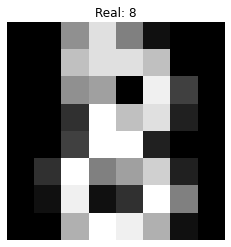

In [41]:
num_img  = 8
l=8
pixels = digits['images'][num_img].reshape((l, l))
label = digits['target'][num_img]

plt.title('Real: {label}'.format(label=label))
plt.axis('off')
plt.imshow(pixels, cmap='gray')
plt.show()

# 4.  Explore y describa para qué se usa el método reshape en el siguiente bloque de código?

la primera línea calcula el número de imagenes en digits que es 1797, luego reshape se usa para modificar la dimensión del objeto. Al usar -1, se infiere la dimensión de la matrix asociada 2D 8x8, pero lo que hace es tomarlo como un TODO (8x8) = 64, se hace un reshape a (1797, 64)

In [45]:
digits.images.shape

(1797, 8, 8)

In [42]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [44]:
data.shape

(1797, 64)

# 5. Cual es la dimensión del vector de caracteristicas y de la variable objetivo?

X = (1797, 64) es decir una matriz 2D

y = (1797,) es un vector con las etiquetas asociadas a las imágenes

In [46]:
# sea X el vector de caracteristicas
X = data
print(X.shape)

# sea "y" la variable objetivo
y = digits.target
print(y.shape)

(1797, 64)
(1797,)


# 6. Explore y explique es para que usa la función train_test_split, pruebe con parametros para test_size iguales a: 0.5, 0.3 y 0.2 y explique la función del paramétro en la siguiente línea de código.